# Example of a Camera Display to HTML5 via MPLD3



In [3]:
%matplotlib inline

In [12]:
import matplotlib.pylab as plt
from ctapipe import io, visualization
from ctapipe.image.toymodel import make_toymodel_shower_image, \
    generate_2d_shower_model
from ctapipe.image.hillas import hillas_parameters
import numpy as np

Just a quick function to mark a pixel and draw lines to its neighbors

In [13]:
def draw_neighbors(geom, pixel_index, color='r', **kwargs):
    """ draw lines between a pixel and its neighbors"""
    neigh = geom.neighbors[pixel_index]  # neighbor indices (not pixel ids)
    x, y = geom.pix_x[pixel_index].value, geom.pix_y[pixel_index].value
    for nn in neigh:
        nx, ny = geom.pix_x[nn].value, geom.pix_y[nn].value
        plt.plot([x, nx], [y, ny], color=color, **kwargs)

Now, let's create a fake Cherenkov image from a given `CameraGeometry` and fill it with some data:

In [16]:
# get the HESS demo camera geometry
geom = io.CameraGeometry.from_name("hess", 1)

# create a fake camera image to display:
model = generate_2d_shower_model(centroid=(0.2, 0.0),
                                 width=0.01,
                                 length=0.1,
                                 psi='35d')

image, sig, bg = make_toymodel_shower_image(geom, model.pdf, 
                                            intensity=50,
                                            nsb_level_pe=1000)

# apply really stupid image cleaning (single threshold):
clean = image.copy()
clean[image <= 3.0 * image.mean()] = 0.0

# calculate image parameters
hillas, _ = hillas_parameters(geom.pix_x.value, geom.pix_y.value, clean)
print(hillas)

MomentParameters(size=20922.456249999996, cen_x=0.19612308354910313, cen_y=0.0050115186050409249, length=0.22544220327629347, width=0.066571140756291475, r=0.19618710258204325, phi=0.025547366383929966, psi=0.60043467834315001, miss=0.16465072834273636)


AttributeError: 'numpy.float64' object has no attribute 'value'

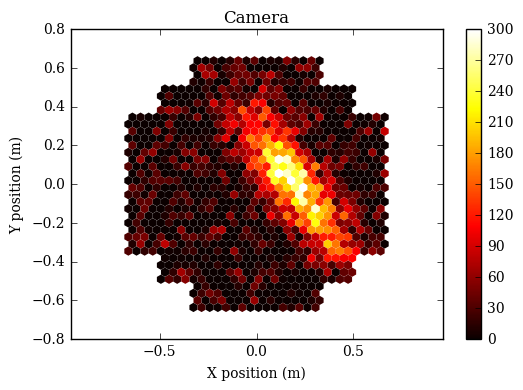

In [17]:
# show the camera image and overlay Hillas ellipse
disp = visualization.CameraDisplay(geom)
disp.set_limits_minmax(0, 300)
disp.add_colorbar()
disp.image = image
disp.overlay_moments(hillas, color='grey', linewidth=3,zorder=10)

# draw the neighbors of pixel 100 in red, and the
# neighbor-neighbors in green
for ii in geom.neighbors[130]:
    draw_neighbors(geom, ii, color='green')
draw_neighbors(geom, 130, color='red',lw=2)

For online use, you can use the mpld3 library to automatically convert this to a zoomable HTML5 plot if you like. Simply call `display()` at the end of the code:

    import mpld3
    ...
    mpld3.display()